In [406]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

# Preprocessing data

In [451]:
data = pd.read_csv("data/HRDataset_v14.csv", sep=',')
dataCopy = data.copy()
male, female = [x for _, x in data.groupby(data['GenderID'] == 0)]

labelsPerfScore = pd.Series(dataCopy['PerformanceScore'].values)
labelsEngagementSurvey = pd.Series(dataCopy['EngagementSurvey'].values)
labelsDepartments = pd.Series(dataCopy['Department'].values)
labelsGender = pd.Series(data['GenderID'].values)

colorsGender = labelsGender.map({0: 'pink', 1: 'blue'})
colorsPerfScore = labelsPerfScore.map({"Fully Meets": 'green', "PIP": 'red', "Needs Improvement": 'orange', "Exceeds": 'purple'})
colorsDepartments = labelsDepartments.map({'Production       ': 'gold', 'IT/IS': 'coral', 'Software Engineering': 'plum','Admin Offices': 'olive', 'Sales': 'turquoise', 'Executive Office': 'teal'})

labelEncoder = LabelEncoder()
def labelToNumeric(attribute, df):
    df.loc.__setitem__((slice(None), (attribute)), labelEncoder.fit_transform(df[attribute]))

categories = data.select_dtypes(include='object').columns.tolist()
for category in categories:
    labelToNumeric(category, data)

imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)


for category in categories:
    labelToNumeric(category, male)
    labelToNumeric(category, female)

male = imputer.fit_transform(male)
female = imputer.fit_transform(female)
display(labelsDepartments.unique())

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

# MDS

In [387]:
mds = MDS(normalized_stress="auto")
mdsScaledData = mds.fit_transform(data)

## Visualize result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


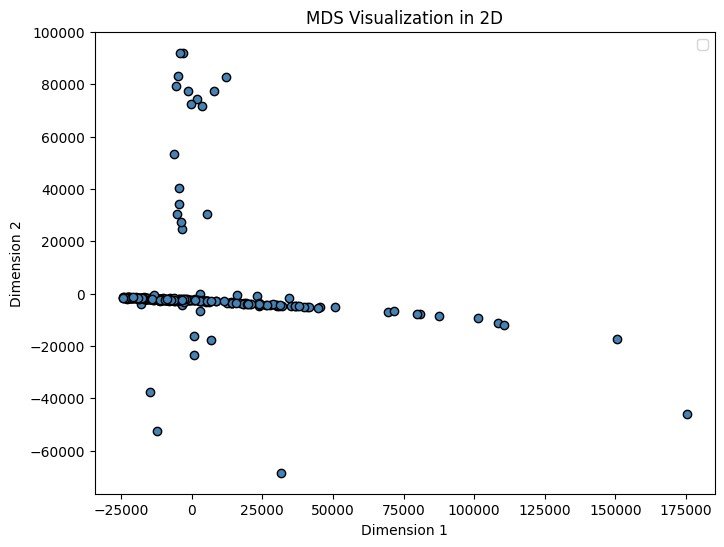

In [388]:
mds = MDS(normalized_stress="auto")
mdsScaledData = mds.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(mdsScaledData[:, 0], mdsScaledData[:, 1], c="steelblue", edgecolors="k")
plt.title('MDS Visualization in 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### M/W

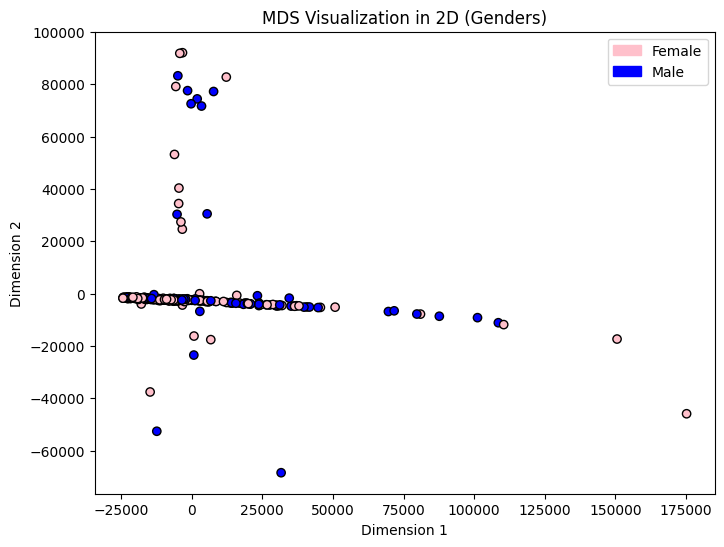

In [389]:
mdsG = MDS(normalized_stress="auto")

mdsScaledDataF = mdsG.fit_transform(female)
mdsScaledDataM = mdsG.fit_transform(male)

plt.figure(figsize=(8, 6))

plt.scatter(mdsScaledData[:, 0], mdsScaledData[:, 1], c=colorsGender, edgecolors="k")
plt.title('MDS Visualization in 2D (Genders)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
pink = mpatches.Patch(color='pink', label='Female')
blue = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[pink,blue])

plt.show()

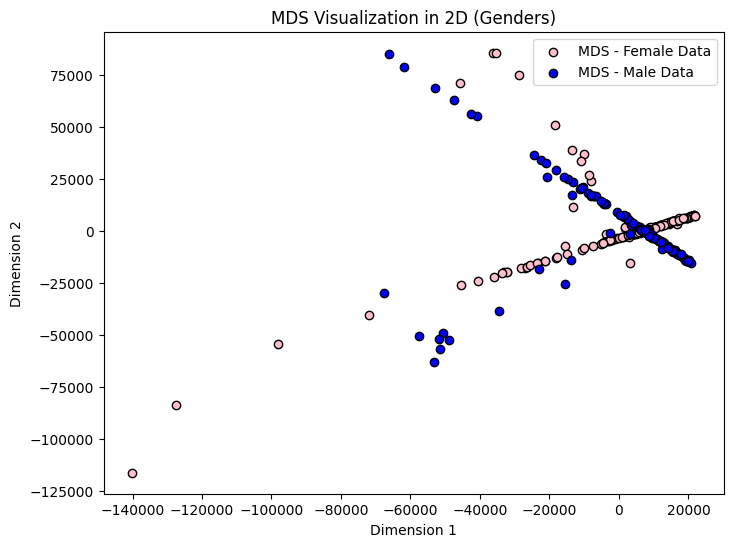

In [390]:
mdsScaledDataF = mds.fit_transform(female)
mdsScaledDataM = mds.fit_transform(male)

plt.figure(figsize=(8, 6))
plt.scatter(mdsScaledDataF[:, 0], mdsScaledDataF[:, 1], c="pink", label='MDS - Female Data', edgecolors="k")
plt.scatter(mdsScaledDataM[:, 0], mdsScaledDataM[:, 1], c="blue", label='MDS - Male Data', edgecolors="k")
plt.title('MDS Visualization in 2D (Genders)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

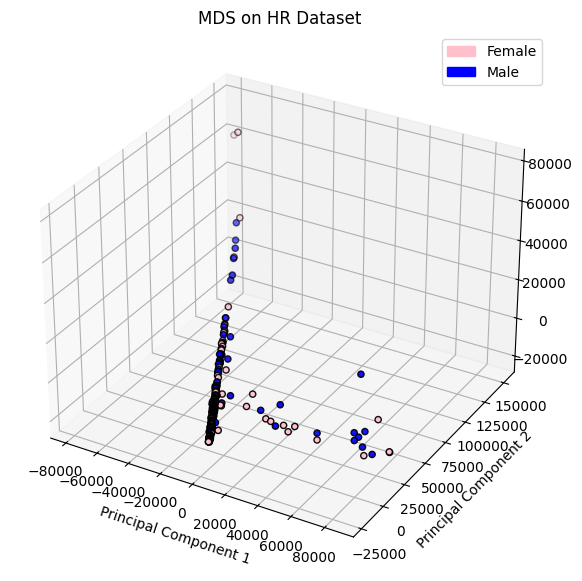

In [416]:
## 3D
mds3D = MDS(normalized_stress="auto", n_components=3)
mdsScaledData3D = mds3D.fit_transform(data)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(mdsScaledData3D[:, 0], mdsScaledData3D[:, 1], mdsScaledData3D[:, 2], edgecolor='k', c=colorsGender)
plt.title('MDS on HR Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[pink,blue])
plt.show()

# PCA

## 2 Dimensions

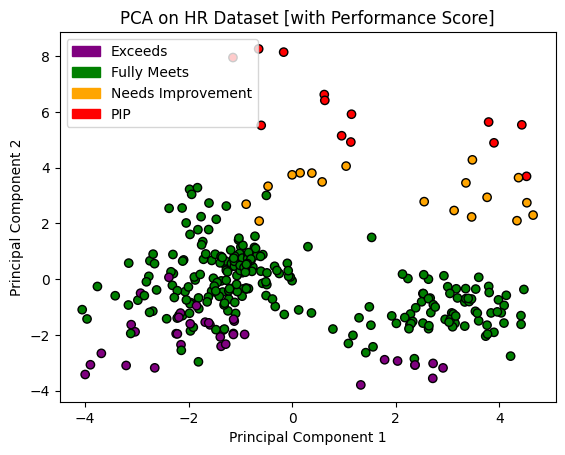

In [427]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

# PCA durchführen
pca = PCA(n_components=2)
pcaFeatures = pca.fit_transform(scaledData)

pcaData = pd.DataFrame(
    data=pcaFeatures, 
    columns=[
        'Principal Component 1', 
        'Principal Component 2'
        ])

scatterPCA = plt.scatter(pcaFeatures[:, 0], pcaFeatures[:, 1], c=colorsPerfScore, edgecolor='k')
plt.title('PCA on HR Dataset [with Performance Score]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(handles=[purple, green, orange, red])
purple = mpatches.Patch(color='purple', label='Exceeds') 
green = mpatches.Patch(color='green', label='Fully Meets')
orange = mpatches.Patch(color='orange', label='Needs Improvement')
red = mpatches.Patch(color='red', label='PIP')

plt.show()

## 3 Dimensions

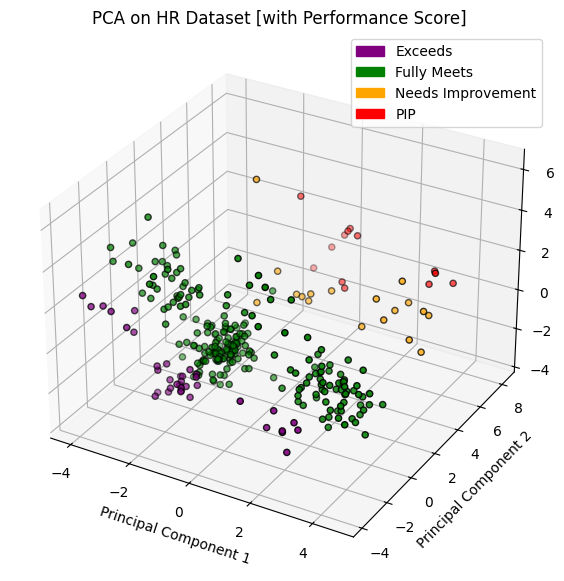

In [439]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

# PCA durchführen
pca3D = PCA(n_components=3)
pcaFeatures3D = pca3D.fit_transform(scaledData)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(pcaFeatures3D[:, 0], pcaFeatures3D[:, 1], pcaFeatures3D[:, 2], c=colorsPerfScore, edgecolor='k')
plt.title('PCA on HR Dataset [with Performance Score]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(handles=[purple, green, orange, red])

plt.show()

# t-SNE

## Departments

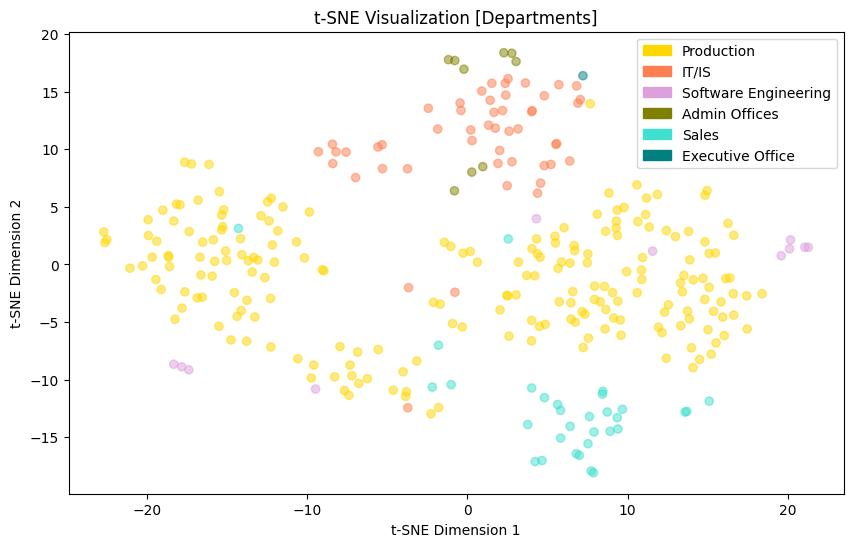

In [454]:
tsne = TSNE(n_components=2)
tsneData = tsne.fit_transform(scaledData)


plt.figure(figsize=(10, 6))
plt.scatter(tsneData[:, 0], tsneData[:, 1], marker='o', c=colorsDepartments, alpha=0.5)
plt.title('t-SNE Visualization [Departments]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')


gold = mpatches.Patch(color='gold', label='Production') 
coral = mpatches.Patch(color='coral', label='IT/IS')
plum = mpatches.Patch(color='plum', label='Software Engineering')
olive = mpatches.Patch(color='olive', label='Admin Offices')
turquoise = mpatches.Patch(color='turquoise', label='Sales')
teal = mpatches.Patch(color='teal', label='Executive Office')
plt.legend(handles=[gold, coral, plum, olive, turquoise, teal])
plt.show()

## Performance Score

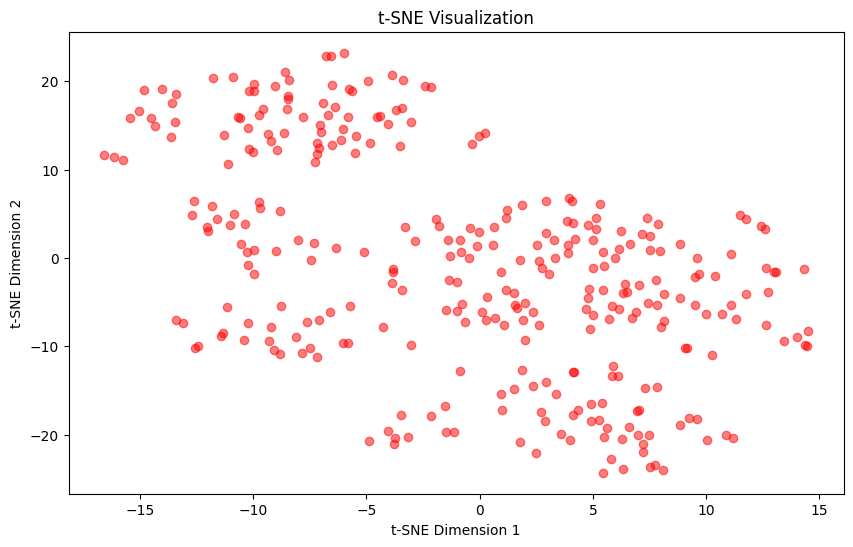

In [464]:
tsne = TSNE(n_components=2)
tsneData = tsne.fit_transform(scaledData)

# Visualisierung der t-SNE-Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(tsneData[:, 0], tsneData[:, 1], marker='o', c="red", alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()